# Logger Usage

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](ここに以下の書式でURLを入れる) 
[![github](https://badgen.net/badge/:status/View%20On%20Github/black?icon=github&label)](https://github.com/AtomScott/SoccerTrack)
[![badge](https://img.shields.io/badge/launch-binder-579ACA.svg?logo=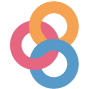)](https://)

---

This tutorial demonstrates how to use the loggers provided with `SoccerTrack`. 

In [1]:
from soccertrack.logging import logger

# The default level is INFO so debug messages are not printed
logger.debug("That's it, beautiful and simple logging!") 

# The following messages are printed
logger.info("This is an info message")
logger.success("success!")
logger.warning("I am warning you Github copilot!")
logger.error("I am error you Github copilot!")
logger.critical("Fire in the hole!")

IPython:0007  💬| This is an info message 
IPython:0008  ✅| success! 
IPython:0009  🤔| I am warning you Github copilot! 
IPython:0010  ❌| I am error you Github copilot! 
IPython:0011  🔥| Fire in the hole! 


In [2]:
from soccertrack.logging import set_log_level

# set the log level to DEBUG
set_log_level('DEBUG') 
logger.debug("That's it, beautiful and simple logging!") 

# set the log level to CRITICAL
set_log_level('critical') # <- using lower case is OK
logger.debug("That's it, beautiful and simple logging!")
logger.critical("Fire in the hole!")

IPython:0005  🐛| That's it, beautiful and simple logging! 
IPython:0010  🔥| Fire in the hole! 


## Classes

In [3]:
from soccertrack.logging import LoggerMixin

class Hello(LoggerMixin):
    def __init__(self):
        super().__init__()

    def world(self):
        self.logger.info("hello world")

hello = Hello()
hello.world() # <- this won't print anything because the log level is set to CRITICAL

# set the log level to INFO
set_log_level('INFO')
hello.world() # <- this will print the message 

Hello:world:0008  💬| hello world 


## Tqdm

SoccerTrack wraps `tqdm` to provide a progress bar that is only visible when it matches the currently set verbosity level.

Below is a snippet of the implemented code. As you can see there is an extra parameter `level` which can be used to set the verbosity level. The default value is "INFO".

``` python
def tqdm(*args, **kwargs, level="INFO"):
    LOG_LEVEL = os.environ.get("LOG_LEVEL", "INFO")
    enable = logger.level(LOG_LEVEL).no <= logger.level(level.upper()).no
    kwargs.update({"disable" : not enable})
    return tqdm(*args, **kwargs)
```

In [5]:
import time
from soccertrack.logging import tqdm

# The progress bar is not visible
for x in tqdm(range(100), level="DEBUG"):
    if x % 20 == 0:
        logger.critical("Iterating #{}", x)
    time.sleep(0.1)

IPython:0007  🔥| Iterating #0 
IPython:0007  🔥| Iterating #20 
IPython:0007  🔥| Iterating #40 
IPython:0007  🔥| Iterating #60 
IPython:0007  🔥| Iterating #80 


In [6]:
# The progress bar is visible
for x in tqdm(range(100), level="INFO"):
    if x % 20 == 0:
        logger.critical("Iterating #{}", x)
    time.sleep(0.1)

  0%|          | 0/100 [00:00<?, ?it/s]

IPython:0004  🔥| Iterating #0 
IPython:0004  🔥| Iterating #20 
IPython:0004  🔥| Iterating #40 
IPython:0004  🔥| Iterating #60 
IPython:0004  🔥| Iterating #80 


In [7]:
# The progress bar is visible
set_log_level('DEBUG') 
for x in tqdm(range(100), level="DEBUG"):
    if x % 20 == 0:
        logger.critical("Iterating #{}", x)
    time.sleep(0.1)

  0%|          | 0/100 [00:00<?, ?it/s]

IPython:0005  🔥| Iterating #0 
IPython:0005  🔥| Iterating #20 
IPython:0005  🔥| Iterating #40 
IPython:0005  🔥| Iterating #60 
IPython:0005  🔥| Iterating #80 


## Other

In [8]:
from soccertrack.logging import inspect

set_log_level('INFO') 
inspect(dir, level="DEBUG")
inspect(dir, level="INFO")
inspect(int, level="WARNING")
inspect(inspect, level="ERROR")

inspect:0143  💬| Inspecting: (<built-in function dir>,) 


╭────────────────── <built-in function dir> ───────────────────╮
│ def dir(...)                                                 │
│                                                              │
│ dir([object]) -> list of strings                             │
│                                                              │
│ 29 attribute(s) not shown. Run inspect(inspect) for options. │
╰──────────────────────────────────────────────────────────────╯

inspect:0143  🤔| Inspecting: (<class 'int'>,) 


╭───────────────────── <class 'int'> ──────────────────────╮
│ class int(...)                                           │
│                                                          │
│ int([x]) -> integer                                      │
│ int(x, base=10) -> integer                               │
│                                                          │
│ denominator = <attribute 'denominator' of 'int' objects> │
│        imag = <attribute 'imag' of 'int' objects>        │
│   numerator = <attribute 'numerator' of 'int' objects>   │
│        real = <attribute 'real' of 'int' objects>        │
╰──────────────────────────────────────────────────────────╯

╭───────────────────────────────────── <function inspect at 0x7f97e0579670> ──────────────────────────────────────╮
│ def inspect(obj: Any, *, console: Union[ForwardRef('Console'), NoneType] = None, title: Union[str, NoneType] =  │
│ None, help: bool = False, methods: bool = False, docs: bool = True, private: bool = False, dunder: bool =       │
│ False, sort: bool = True, all: bool = False, value: bool = True) -> None:                                       │
│                                                                                                                 │
│ Inspect any Python object.                                                                                      │
│                                                                                                                 │
│ * inspect(<OBJECT>) to see summarized info.                                                                     │
│ * inspect(<OBJECT>, methods=True) to see methods.                                                               │
│ * inspect(<OBJECT>, help=True) to see full (non-abbreviated) help.                                              │
│ * inspect(<OBJECT>, private=True) to see private attributes (single underscore).                                │
│ * inspect(<OBJECT>, dunder=True) to see attributes beginning with double underscore.                            │
│ * inspect(<OBJECT>, all=True) to see all attributes.                                                            │
│                                                                                                                 │
│ Args:                                                                                                           │
│     obj (Any): An object to inspect.                                                                            │
│     title (str, optional): Title to display over inspect result, or None use type. Defaults to None.            │
│     help (bool, optional): Show full help text rather than just first paragraph. Defaults to False.             │
│     methods (bool, optional): Enable inspection of callables. Defaults to False.                                │
│     docs (bool, optional): Also render doc strings. Defaults to True.                                           │
│     private (bool, optional): Show private attributes (beginning with underscore). Defaults to False.           │
│     dunder (bool, optional): Show attributes starting with double underscore. Defaults to False.                │
│     sort (bool, optional): Sort attributes alphabetically. Defaults to True.                                    │
│     all (bool, optional): Show all attributes. Defaults to False.                                               │
│     value (bool, optional): Pretty print value. Defaults to True.                                               │
│                                                                                                                 │
│ 35 attribute(s) not shown. Run inspect(inspect) for options.                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯